# Task 4: Predicting Insurance Claim Amounts

# **Objective:**

 Estimate the medical insurance claim amount based on personal data.

# Instructions :

● Train a Linear Regression model to predict charges.

● Visualize how BMI, age, and smoking status impact insurance charges.

● Evaluate model performance using MAE and RMSE.

# **Dataset : Medical Cost Personal Dataset **

# Content

**Columns**

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#loading dataset
df=pd.read_csv('/content/sample_data/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# we have to encode categorical variables such as "sex" and and region
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
#endoing 'sex' using get_dummies
df=pd.get_dummies(df,columns=['sex'])
df.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,True,False
1,18,33.770,1,no,southeast,1725.55230,False,True
2,28,33.000,3,no,southeast,4449.46200,False,True
3,33,22.705,0,no,northwest,21984.47061,False,True
4,32,28.880,0,no,northwest,3866.85520,False,True


In [ ]:

df['smoker'].value_counts()


,count
smoker,
no,1064
yes,274


In [ ]:
#replace 'yes' with 1 and 'no' with 0 in smoker variable
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.head()

/tmp/ipython-input-3184525637.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':1,'no':0}},inplace=True)


,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,southwest,16884.92400,True,False
1,18,33.770,1,0,southeast,1725.55230,False,True
2,28,33.000,3,0,southeast,4449.46200,False,True
3,33,22.705,0,0,northwest,21984.47061,False,True
4,32,28.880,0,0,northwest,3866.85520,False,True


In [ ]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
smoker,int64
region,object
charges,float64
sex_female,bool
sex_male,bool


In [ ]:
#encode 'region' variable
df=pd.get_dummies(df,columns=['region'])
df.head()


,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,True,False,False,False,False,True
1,18,33.770,1,0,1725.55230,False,True,False,False,True,False
2,28,33.000,3,0,4449.46200,False,True,False,False,True,False
3,33,22.705,0,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,0,3866.85520,False,True,False,True,False,False


In [ ]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
smoker,int64
charges,float64
sex_female,bool
sex_male,bool
region_northeast,bool
region_northwest,bool
region_southeast,bool


we have done the preprocessing now we have to train a linearregression model

In [ ]:
#import linearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
#split dataset
x=df.drop('charges',axis=1)
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#fit the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#make prediction
y_pred=model.predict(x_test)

In [ ]:
#Evaluate model performance using MAE and RMSE
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',rmse)



Mean Absolute Error: 4181.194473753641
Root Mean Squared Error: 5796.2846592762735


In [ ]:
#R² score
r2=r2_score(y_test,y_pred)
print('R² score:',r2)

R² score: 0.7835929767120723


**conclusion :** about 78% of the changes in charges can be correctly predicted based on the input features

**Now we will Visualize how BMI, age, and smoking status impact insurance charges.**

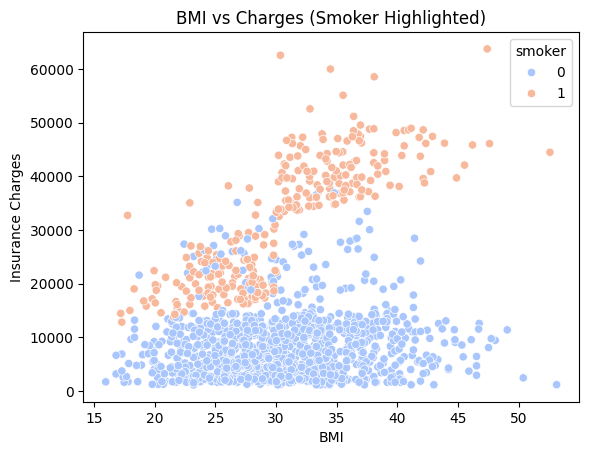

In [ ]:
#Scatter Plot: BMI vs Charges
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'], palette='coolwarm')
plt.title('BMI vs Charges (Smoker Highlighted)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

**Conslusion:** Smokers with higher BMI tend to have much higher insurance charges. Non-smokers, even with high BMI, generally have lower charges. This shows that smoking and BMI both impact costs, with smoking having a stronger effect.

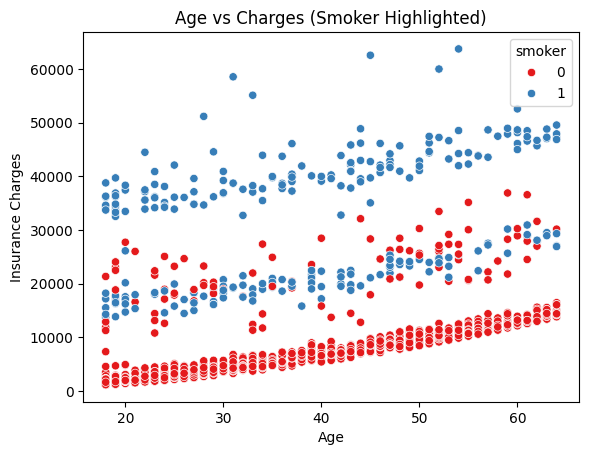

In [ ]:
#Scatter Plot: Age vs Charges
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'], palette='Set1')
plt.title('Age vs Charges (Smoker Highlighted)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()


**Conclusion :** as age increases, insurance charges generally rise for both smokers and non-smokers.
However, smokers (blue) consistently have much higher charges across all age groups compared to non-smokers (red).
This shows that age and smoking both significantly impact insurance costs, with smoking having a stronger influence.

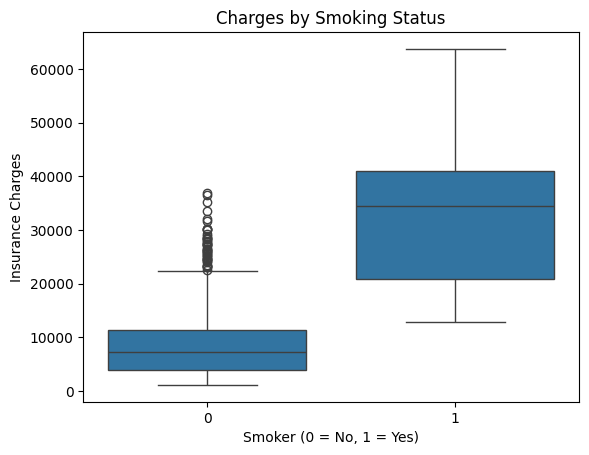

In [ ]:
sns.boxplot(x=df['smoker'], y=df['charges'])
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Insurance Charges')
plt.show()


**Conclusion :** The box plot shows that smokers (1) have much higher insurance charges than non-smokers (0).
Smokers not only have higher median charges but also a wider range of costs, indicating greater financial risk.
This highlights that smoking is a major factor in increasing insurance costs.


In [ ]:
#save the model
import joblib
joblib.dump(model,'insurance_model.pkl')


['insurance_model.pkl']